## Алгоритм вырезания треков:
На вход подается:
- последовательность изображений, из которых вырезаются патчи (маски либо исходные)
- txt файл с информацией о треках (man_track.txt)
- последовательность изображений с GT трекинга (TRA GT)

Далее открываем текстовый файл.
Каждая строчка - один трек.
Четыре значения в строке по порядку - id трека, начальный кадр, конечный кадр, id родительского трека. Родительский трек нам не нужен.
id трека соответствует значению интенсивности в TRA GT (man_track###.tif)

Я делал цикл по строчкам.
Создаем папку для трека track_<id>
В цикле берем изображения в которых есть текущий трек (с начального кадра по конечный), выделяем объект маской img==track_id и считаем центроид. Далее вырезаем патч из чего нужно (маски либо исходные изображения). Патч - квадрат с центром в центроиде и некоторым радиусом r. В результате размер патча должен получится (2r+1)x(2r+1).
Сохраняем патч в папку под именем crop<slice_number>.tif
Размеры радиуса я брал разные для разных последовательностей. Для японских r=20, для GOWT1 r=50, для HeLa r=25.

Если патч вылезает за пределы картинки, то я его обрезал, поэтому можно встретить патчи меньшего размера чем остальные. В принципе их можно совсем выкидывать, если неудобно обрабатывать изображения разного размера

In [23]:
from matplotlib import pyplot as plt


In [ ]:
from skimage import io
import os
import numpy as np

path_images = '/data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02/'
path_tracks = '/data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_GT/TRA/'
tra_gt_path = '/data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_GT/TRA/man_track.txt'
crop_path = '/data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/'
r=25

with open(tra_gt_path, 'r') as file:
    tracks = [l.strip() for l in file.readlines()]

for i, track in enumerate(tracks):
    track_id, start_frame, end_frame, _ = list(map(int, track.split(' ')))
    opath = os.path.join(crop_path, f'track_{track_id}')
    os.makedirs(opath, exist_ok=True)
    for j in range(start_frame, end_frame+1):
        name = path_tracks + f'man_track{j:03d}.tif'
        img = io.imread(name)
        name = path_images + f't{j:03d}.tif'
        cell_img = io.imread(name)
        
        mask = img == track_id
        y, x = np.where(mask)
        cx, cy = np.ceil(x.mean()), np.ceil(y.mean())
        cx, cy = list(map(int, [cx, cy]))
        h, w = img.shape[:2]
        crop = cell_img[max(cy-r, 0): min(cy+r+1, h), max(cx-r, 0): min(cx+r+1, w)]
        io.imsave(opath + f'/crop_{i}_{j}.tif', crop)
#         print(crop.max())
#         input()
        

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_1/crop_0_0.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_2/crop_1_1.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_2/crop_1_2.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_2/crop_1_3.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_2/crop_1_4.tif is a low contrast image


/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_4/crop_2_46.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_4/crop_2_47.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_4/crop_2_48.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_4/crop_2_49.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_4/crop_2_50.tif is a low contrast i

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_5/crop_3_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_5/crop_3_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_5/crop_3_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_5/crop_3_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_5/crop_3_65.tif is a low contrast i

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_8/crop_6_7.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_8/crop_6_8.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_8/crop_6_9.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_8/crop_6_10.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_8/crop_6_11.tif is a low contrast imag

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_10/crop_7_52.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_10/crop_7_53.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_10/crop_7_54.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_10/crop_7_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_10/crop_7_56.tif is a low contr

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_11/crop_8_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_11/crop_8_36.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_11/crop_8_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_11/crop_8_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_11/crop_8_39.tif is a low contr

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_11/crop_8_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_11/crop_8_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_11/crop_8_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_11/crop_8_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_11/crop_8_83.tif is a low contr

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_16/crop_12_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_16/crop_12_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_16/crop_12_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_16/crop_12_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_16/crop_12_41.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_16/crop_12_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_16/crop_12_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_16/crop_12_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_16/crop_12_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_16/crop_12_86.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_20/crop_16_9.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_20/crop_16_10.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_20/crop_16_11.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_20/crop_16_12.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_20/crop_16_13.tif is a low c

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_21/crop_17_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_21/crop_17_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_21/crop_17_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_21/crop_17_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_21/crop_17_61.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_23/crop_18_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_23/crop_18_36.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_23/crop_18_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_23/crop_18_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_23/crop_18_39.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_23/crop_18_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_23/crop_18_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_23/crop_18_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_23/crop_18_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_23/crop_18_83.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_26/crop_20_34.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_26/crop_20_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_26/crop_20_36.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_26/crop_20_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_26/crop_20_38.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_26/crop_20_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_26/crop_20_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_26/crop_20_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_26/crop_20_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_26/crop_20_83.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_27/crop_21_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_27/crop_21_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_27/crop_21_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_27/crop_21_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_27/crop_21_65.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_28/crop_22_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_28/crop_22_15.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_28/crop_22_16.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_28/crop_22_17.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_28/crop_22_18.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_29/crop_23_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_29/crop_23_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_29/crop_23_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_29/crop_23_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_29/crop_23_62.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_31/crop_24_33.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_31/crop_24_34.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_31/crop_24_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_31/crop_24_36.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_31/crop_24_37.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_31/crop_24_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_31/crop_24_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_31/crop_24_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_31/crop_24_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_31/crop_24_81.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_34/crop_26_32.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_34/crop_26_33.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_34/crop_26_34.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_34/crop_26_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_34/crop_26_36.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_34/crop_26_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_34/crop_26_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_34/crop_26_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_34/crop_26_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_34/crop_26_80.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_35/crop_27_50.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_35/crop_27_51.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_35/crop_27_52.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_35/crop_27_53.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_35/crop_27_54.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_38/crop_29_4.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_38/crop_29_5.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_38/crop_29_6.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_38/crop_29_7.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_38/crop_29_8.tif is a low contr

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_39/crop_30_21.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_39/crop_30_22.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_39/crop_30_23.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_39/crop_30_24.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_39/crop_30_25.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_41/crop_31_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_41/crop_31_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_41/crop_31_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_41/crop_31_65.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_41/crop_31_66.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_42/crop_32_46.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_42/crop_32_47.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_42/crop_32_48.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_42/crop_32_49.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_42/crop_32_50.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_43/crop_33_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_43/crop_33_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_43/crop_33_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_43/crop_33_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_43/crop_33_41.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_43/crop_33_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_43/crop_33_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_43/crop_33_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_43/crop_33_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_43/crop_33_86.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_45/crop_34_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_45/crop_34_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_45/crop_34_73.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_45/crop_34_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_45/crop_34_75.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_46/crop_35_25.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_46/crop_35_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_46/crop_35_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_46/crop_35_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_46/crop_35_29.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_48/crop_36_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_48/crop_36_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_48/crop_36_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_48/crop_36_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_48/crop_36_73.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_49/crop_37_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_49/crop_37_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_49/crop_37_65.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_49/crop_37_66.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_49/crop_37_67.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_50/crop_38_16.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_50/crop_38_17.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_50/crop_38_18.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_50/crop_38_19.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_50/crop_38_20.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_50/crop_38_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_50/crop_38_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_50/crop_38_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_50/crop_38_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_50/crop_38_65.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_54/crop_40_48.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_54/crop_40_49.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_54/crop_40_50.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_54/crop_40_51.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_54/crop_40_52.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_56/crop_41_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_56/crop_41_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_56/crop_41_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_56/crop_41_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_56/crop_41_44.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_56/crop_41_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_56/crop_41_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_56/crop_41_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_56/crop_41_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_56/crop_41_88.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_58/crop_43_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_58/crop_43_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_58/crop_43_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_58/crop_43_44.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_58/crop_43_45.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_58/crop_43_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_58/crop_43_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_58/crop_43_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_58/crop_43_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_58/crop_43_89.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_60/crop_44_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_60/crop_44_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_60/crop_44_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_60/crop_44_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_60/crop_44_80.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_63/crop_46_30.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_63/crop_46_31.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_63/crop_46_32.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_63/crop_46_33.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_63/crop_46_34.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_64/crop_47_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_64/crop_47_75.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_64/crop_47_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_64/crop_47_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_64/crop_47_78.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_68/crop_48_68.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_68/crop_48_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_68/crop_48_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_68/crop_48_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_68/crop_48_72.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_69/crop_49_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_69/crop_49_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_69/crop_49_29.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_69/crop_49_30.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_69/crop_49_31.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_70/crop_50_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_70/crop_50_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_70/crop_50_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_70/crop_50_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_71/crop_51_36.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_71/crop_51_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_71/crop_51_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_71/crop_51_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_71/crop_51_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_71/crop_51_80.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_72/crop_52_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_72/crop_52_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_72/crop_52_73.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_72/crop_52_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_72/crop_52_75.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_75/crop_54_25.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_75/crop_54_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_75/crop_54_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_75/crop_54_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_75/crop_54_29.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_76/crop_55_32.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_76/crop_55_33.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_76/crop_55_34.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_76/crop_55_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_76/crop_55_36.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_77/crop_56_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_77/crop_56_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_77/crop_56_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_77/crop_56_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_77/crop_56_81.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_80/crop_58_52.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_80/crop_58_53.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_80/crop_58_54.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_80/crop_58_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_80/crop_58_56.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_82/crop_59_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_82/crop_59_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_82/crop_59_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_82/crop_59_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_82/crop_59_60.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_85/crop_61_8.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_85/crop_61_9.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_85/crop_61_10.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_85/crop_61_11.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_85/crop_61_12.tif is a low co

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_85/crop_61_53.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_85/crop_61_54.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_85/crop_61_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_85/crop_61_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_85/crop_61_57.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_86/crop_62_13.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_86/crop_62_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_86/crop_62_15.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_86/crop_62_16.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_86/crop_62_17.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_86/crop_62_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_86/crop_62_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_86/crop_62_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_86/crop_62_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_86/crop_62_62.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_89/crop_64_11.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_89/crop_64_12.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_89/crop_64_13.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_89/crop_64_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_89/crop_64_15.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_89/crop_64_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_89/crop_64_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_89/crop_64_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_89/crop_64_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_89/crop_64_63.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_90/crop_65_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_90/crop_65_36.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_90/crop_65_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_90/crop_65_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_90/crop_65_39.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_92/crop_66_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_92/crop_66_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_92/crop_66_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_92/crop_66_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_92/crop_66_84.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_93/crop_67_90.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_93/crop_67_91.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_95/crop_68_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_95/crop_68_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_95/crop_68_82.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_97/crop_70_17.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_97/crop_70_18.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_97/crop_70_19.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_97/crop_70_20.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_97/crop_70_21.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_97/crop_70_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_97/crop_70_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_97/crop_70_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_97/crop_70_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_97/crop_70_65.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_98/crop_71_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_98/crop_71_15.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_98/crop_71_16.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_98/crop_71_17.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_98/crop_71_18.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_98/crop_71_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_98/crop_71_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_98/crop_71_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_98/crop_71_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_98/crop_71_64.tif is a low 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_99/crop_72_13.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_99/crop_72_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_99/crop_72_15.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_99/crop_72_16.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_100/crop_73_18.tif is a low

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_104/crop_76_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_104/crop_76_15.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_104/crop_76_16.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_104/crop_76_17.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_104/crop_76_18.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_104/crop_76_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_104/crop_76_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_104/crop_76_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_104/crop_76_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_104/crop_76_63.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_105/crop_77_12.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_105/crop_77_13.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_105/crop_77_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_105/crop_77_15.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_105/crop_77_16.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_106/crop_78_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_106/crop_78_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_106/crop_78_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_106/crop_78_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_106/crop_78_61.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_108/crop_79_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_108/crop_79_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_108/crop_79_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_108/crop_79_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_108/crop_79_41.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_108/crop_79_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_108/crop_79_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_108/crop_79_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_108/crop_79_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_108/crop_79_85.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_110/crop_81_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_110/crop_81_36.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_110/crop_81_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_110/crop_81_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_110/crop_81_39.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_110/crop_81_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_110/crop_81_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_110/crop_81_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_110/crop_81_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_110/crop_81_84.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_112/crop_82_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_112/crop_82_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_112/crop_82_65.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_112/crop_82_66.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_112/crop_82_67.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_113/crop_83_16.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_113/crop_83_17.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_113/crop_83_18.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_113/crop_83_19.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_113/crop_83_20.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_116/crop_85_24.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_116/crop_85_25.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_116/crop_85_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_116/crop_85_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_116/crop_85_28.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_118/crop_86_68.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_118/crop_86_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_118/crop_86_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_118/crop_86_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_118/crop_86_72.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_119/crop_87_75.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_119/crop_87_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_119/crop_87_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_119/crop_87_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_119/crop_87_79.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_121/crop_88_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_121/crop_88_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_121/crop_88_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_121/crop_88_90.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_121/crop_88_91.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_123/crop_90_8.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_123/crop_90_9.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_123/crop_90_10.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_123/crop_90_11.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_123/crop_90_12.tif is a l

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_125/crop_91_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_125/crop_91_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_125/crop_91_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_125/crop_91_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_125/crop_91_59.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_126/crop_92_32.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_126/crop_92_33.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_126/crop_92_34.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_126/crop_92_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_126/crop_92_36.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_126/crop_92_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_126/crop_92_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_126/crop_92_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_126/crop_92_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_126/crop_92_80.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_128/crop_94_29.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_128/crop_94_30.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_128/crop_94_31.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_128/crop_94_32.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_128/crop_94_33.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_128/crop_94_73.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_128/crop_94_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_128/crop_94_75.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_128/crop_94_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_128/crop_94_77.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_129/crop_95_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_129/crop_95_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_129/crop_95_29.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_129/crop_95_30.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_129/crop_95_31.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_129/crop_95_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_129/crop_95_73.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_129/crop_95_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_129/crop_95_75.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_129/crop_95_76.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_130/crop_96_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_130/crop_96_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_131/crop_97_0.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_131/crop_97_1.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_131/crop_97_2.tif is a lo

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_133/crop_99_47.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_133/crop_99_48.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_133/crop_99_49.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_133/crop_99_50.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_133/crop_99_51.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_134/crop_100_12.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_134/crop_100_13.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_134/crop_100_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_134/crop_100_15.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_134/crop_100_16.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_134/crop_100_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_134/crop_100_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_134/crop_100_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_134/crop_100_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_134/crop_100_61.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_137/crop_103_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_137/crop_103_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_137/crop_103_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_137/crop_103_73.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_137/crop_103_74.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_140/crop_105_51.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_140/crop_105_52.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_140/crop_105_53.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_140/crop_105_54.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_140/crop_105_55.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_144/crop_107_20.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_144/crop_107_21.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_144/crop_107_22.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_144/crop_107_23.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_144/crop_107_24.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_146/crop_108_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_146/crop_108_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_146/crop_108_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_146/crop_108_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_146/crop_108_43.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_146/crop_108_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_146/crop_108_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_146/crop_108_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_146/crop_108_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_146/crop_108_88.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_148/crop_109_68.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_148/crop_109_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_148/crop_109_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_148/crop_109_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_148/crop_109_72.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_149/crop_110_52.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_149/crop_110_53.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_149/crop_110_54.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_149/crop_110_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_149/crop_110_56.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_152/crop_112_5.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_152/crop_112_6.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_152/crop_112_7.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_152/crop_112_8.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_152/crop_112_9.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_154/crop_113_15.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_154/crop_113_16.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_154/crop_113_17.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_154/crop_113_18.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_154/crop_113_19.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_156/crop_114_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_156/crop_114_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_156/crop_114_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_156/crop_114_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_156/crop_114_64.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_158/crop_115_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_158/crop_115_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_158/crop_115_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_158/crop_115_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_158/crop_115_60.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_160/crop_116_49.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_160/crop_116_50.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_160/crop_116_51.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_160/crop_116_52.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_160/crop_116_53.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_161/crop_117_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_161/crop_117_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_161/crop_117_44.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_161/crop_117_45.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_161/crop_117_46.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_161/crop_117_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_161/crop_117_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_161/crop_117_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_161/crop_117_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_161/crop_117_90.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_164/crop_119_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_164/crop_119_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_165/crop_120_10.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_165/crop_120_11.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_165/crop_120_12.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_167/crop_121_52.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_167/crop_121_53.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_168/crop_122_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_168/crop_122_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_168/crop_122_44.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_168/crop_122_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_168/crop_122_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_168/crop_122_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_168/crop_122_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_168/crop_122_88.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_169/crop_123_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_169/crop_123_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_169/crop_123_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_169/crop_123_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_169/crop_123_82.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_171/crop_124_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_171/crop_124_75.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_171/crop_124_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_171/crop_124_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_171/crop_124_78.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_174/crop_127_36.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_174/crop_127_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_174/crop_127_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_174/crop_127_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_174/crop_127_40.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_174/crop_127_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_174/crop_127_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_174/crop_127_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_174/crop_127_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_174/crop_127_86.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_176/crop_129_36.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_176/crop_129_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_176/crop_129_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_176/crop_129_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_176/crop_129_40.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_176/crop_129_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_176/crop_129_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_176/crop_129_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_176/crop_129_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_176/crop_129_84.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_179/crop_132_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_179/crop_132_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_179/crop_132_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_179/crop_132_29.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_179/crop_132_30.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_179/crop_132_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_179/crop_132_75.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_179/crop_132_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_179/crop_132_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_179/crop_132_78.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_181/crop_133_54.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_181/crop_133_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_181/crop_133_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_181/crop_133_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_181/crop_133_58.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_183/crop_134_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_183/crop_134_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_183/crop_134_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_183/crop_134_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_183/crop_134_90.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_185/crop_136_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_185/crop_136_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_185/crop_136_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_185/crop_136_44.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_185/crop_136_45.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_187/crop_137_34.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_187/crop_137_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_187/crop_137_36.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_187/crop_137_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_187/crop_137_38.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_189/crop_138_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_189/crop_138_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_189/crop_138_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_189/crop_138_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_189/crop_138_87.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_193/crop_141_32.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_193/crop_141_33.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_193/crop_141_34.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_193/crop_141_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_193/crop_141_36.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_193/crop_141_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_193/crop_141_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_193/crop_141_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_193/crop_141_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_193/crop_141_81.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_195/crop_143_32.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_195/crop_143_33.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_195/crop_143_34.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_195/crop_143_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_195/crop_143_36.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_195/crop_143_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_195/crop_143_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_195/crop_143_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_195/crop_143_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_195/crop_143_82.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_197/crop_144_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_197/crop_144_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_197/crop_144_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_197/crop_144_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_197/crop_144_65.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_198/crop_145_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_198/crop_145_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_198/crop_145_44.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_198/crop_145_45.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_198/crop_145_46.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_199/crop_146_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_199/crop_146_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_199/crop_146_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_199/crop_146_90.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_199/crop_146_91.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_202/crop_148_45.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_202/crop_148_46.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_202/crop_148_47.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_202/crop_148_48.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_202/crop_148_49.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_202/crop_148_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_202/crop_148_90.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_202/crop_148_91.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_203/crop_149_31.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_203/crop_149_32.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_203/crop_149_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_203/crop_149_75.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_203/crop_149_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_203/crop_149_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_203/crop_149_78.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_206/crop_151_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_206/crop_151_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_206/crop_151_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_206/crop_151_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_206/crop_151_63.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_207/crop_152_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_207/crop_152_65.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_207/crop_152_66.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_207/crop_152_67.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_207/crop_152_68.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_210/crop_154_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_210/crop_154_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_210/crop_154_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_210/crop_154_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_210/crop_154_84.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_214/crop_157_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_214/crop_157_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_214/crop_157_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_214/crop_157_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_214/crop_157_89.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_216/crop_159_11.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_216/crop_159_12.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_216/crop_159_13.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_216/crop_159_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_216/crop_159_15.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_218/crop_160_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_218/crop_160_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_218/crop_160_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_218/crop_160_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_218/crop_160_61.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_219/crop_161_48.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_219/crop_161_49.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_219/crop_161_50.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_219/crop_161_51.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_219/crop_161_52.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_220/crop_162_0.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_220/crop_162_1.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_220/crop_162_2.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_220/crop_162_3.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_220/crop_162_4.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_222/crop_163_47.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_222/crop_163_48.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_222/crop_163_49.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_222/crop_163_50.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_222/crop_163_51.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_222/crop_163_91.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_223/crop_164_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_223/crop_164_29.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_223/crop_164_30.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_223/crop_164_31.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_223/crop_164_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_223/crop_164_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_223/crop_164_73.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_223/crop_164_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_223/crop_164_75.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_224/crop_165_25.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_224/crop_165_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_224/crop_165_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_224/crop_165_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_224/crop_165_29.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_225/crop_166_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_225/crop_166_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_225/crop_166_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_225/crop_166_73.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_225/crop_166_74.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_227/crop_167_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_227/crop_167_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_227/crop_167_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_227/crop_167_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_227/crop_167_59.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_229/crop_168_7.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_229/crop_168_8.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_229/crop_168_9.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_229/crop_168_10.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_229/crop_168_11.tif is

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_230/crop_169_54.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_230/crop_169_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_230/crop_169_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_230/crop_169_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_230/crop_169_58.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_232/crop_170_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_232/crop_170_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_232/crop_170_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_232/crop_170_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_232/crop_170_43.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_232/crop_170_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_232/crop_170_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_232/crop_170_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_232/crop_170_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_232/crop_170_88.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_234/crop_172_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_234/crop_172_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_234/crop_172_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_234/crop_172_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_234/crop_172_44.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_234/crop_172_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_234/crop_172_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_234/crop_172_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_234/crop_172_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_234/crop_172_88.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_236/crop_173_46.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_236/crop_173_47.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_236/crop_173_48.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_236/crop_173_49.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_236/crop_173_50.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_237/crop_174_0.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_237/crop_174_1.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_237/crop_174_2.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_237/crop_174_3.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_237/crop_174_4.tif is a

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_238/crop_175_47.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_238/crop_175_48.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_238/crop_175_49.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_238/crop_175_50.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_238/crop_175_51.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_238/crop_175_91.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_240/crop_176_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_240/crop_176_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_240/crop_176_29.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_240/crop_176_30.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_240/crop_176_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_240/crop_176_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_240/crop_176_73.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_240/crop_176_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_240/crop_176_75.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_241/crop_177_25.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_241/crop_177_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_241/crop_177_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_241/crop_177_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_241/crop_177_29.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_243/crop_178_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_243/crop_178_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_243/crop_178_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_243/crop_178_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_243/crop_178_73.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_244/crop_179_65.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_244/crop_179_66.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_244/crop_179_67.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_244/crop_179_68.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_244/crop_179_69.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_245/crop_180_19.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_245/crop_180_20.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_245/crop_180_21.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_245/crop_180_22.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_245/crop_180_23.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_247/crop_181_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_247/crop_181_65.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_247/crop_181_66.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_247/crop_181_67.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_247/crop_181_68.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_250/crop_183_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_250/crop_183_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_250/crop_183_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_250/crop_183_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_250/crop_183_60.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_251/crop_184_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_251/crop_184_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_251/crop_184_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_251/crop_184_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_251/crop_184_63.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_252/crop_185_12.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_252/crop_185_13.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_252/crop_185_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_252/crop_185_15.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_252/crop_185_16.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_253/crop_186_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_253/crop_186_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_253/crop_186_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_253/crop_186_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_253/crop_186_64.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_255/crop_187_44.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_255/crop_187_45.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_255/crop_187_46.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_255/crop_187_47.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_255/crop_187_48.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_255/crop_187_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_255/crop_187_90.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_255/crop_187_91.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_258/crop_188_0.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_258/crop_188_1.tif i

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_261/crop_190_18.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_261/crop_190_19.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_261/crop_190_20.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_261/crop_190_21.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_261/crop_190_22.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_263/crop_191_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_263/crop_191_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_263/crop_191_65.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_263/crop_191_66.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_263/crop_191_67.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_264/crop_192_54.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_264/crop_192_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_264/crop_192_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_264/crop_192_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_264/crop_192_58.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_266/crop_193_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_266/crop_193_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_266/crop_193_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_266/crop_193_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_266/crop_193_62.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_267/crop_194_52.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_267/crop_194_53.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_267/crop_194_54.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_267/crop_194_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_267/crop_194_56.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_268/crop_195_6.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_268/crop_195_7.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_268/crop_195_8.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_268/crop_195_9.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_268/crop_195_10.tif is 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_269/crop_196_54.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_269/crop_196_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_269/crop_196_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_269/crop_196_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_269/crop_196_58.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_271/crop_197_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_271/crop_197_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_271/crop_197_44.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_271/crop_197_45.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_271/crop_197_46.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_271/crop_197_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_271/crop_197_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_271/crop_197_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_271/crop_197_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_271/crop_197_90.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_274/crop_199_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_274/crop_199_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_274/crop_199_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_274/crop_199_44.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_274/crop_199_45.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_274/crop_199_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_274/crop_199_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_274/crop_199_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_274/crop_199_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_274/crop_199_90.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_276/crop_200_66.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_276/crop_200_67.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_276/crop_200_68.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_276/crop_200_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_276/crop_200_70.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_278/crop_202_20.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_278/crop_202_21.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_278/crop_202_22.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_278/crop_202_23.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_278/crop_202_24.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_278/crop_202_65.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_278/crop_202_66.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_278/crop_202_67.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_278/crop_202_68.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_278/crop_202_69.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_281/crop_204_45.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_281/crop_204_46.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_281/crop_204_47.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_281/crop_204_48.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_281/crop_204_49.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_281/crop_204_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_281/crop_204_90.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_281/crop_204_91.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_283/crop_205_45.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_283/crop_205_46.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_283/crop_205_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_283/crop_205_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_283/crop_205_90.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_283/crop_205_91.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_285/crop_206_76.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_287/crop_208_9.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_287/crop_208_10.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_287/crop_208_11.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_287/crop_208_12.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_287/crop_208_13.tif 

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_289/crop_209_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_289/crop_209_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_289/crop_209_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_289/crop_209_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_289/crop_209_59.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_290/crop_210_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_290/crop_210_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_290/crop_210_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_290/crop_210_44.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_290/crop_210_45.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_290/crop_210_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_290/crop_210_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_290/crop_210_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_290/crop_210_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_290/crop_210_90.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_294/crop_213_7.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_294/crop_213_8.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_294/crop_213_9.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_294/crop_213_10.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_294/crop_213_11.tif is

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_296/crop_214_53.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_296/crop_214_54.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_296/crop_214_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_296/crop_214_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_296/crop_214_57.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_297/crop_215_23.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_297/crop_215_24.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_297/crop_215_25.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_297/crop_215_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_297/crop_215_27.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_297/crop_215_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_297/crop_215_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_297/crop_215_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_297/crop_215_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_297/crop_215_73.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_300/crop_217_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_300/crop_217_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_300/crop_217_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_300/crop_217_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_300/crop_217_41.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_300/crop_217_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_300/crop_217_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_300/crop_217_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_300/crop_217_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_300/crop_217_86.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_301/crop_218_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_301/crop_218_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_301/crop_218_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_301/crop_218_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_301/crop_218_73.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_303/crop_220_23.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_303/crop_220_24.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_303/crop_220_25.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_303/crop_220_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_303/crop_220_27.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_303/crop_220_67.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_303/crop_220_68.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_303/crop_220_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_303/crop_220_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_303/crop_220_71.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_305/crop_221_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_305/crop_221_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_305/crop_221_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_305/crop_221_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_305/crop_221_43.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_305/crop_221_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_305/crop_221_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_305/crop_221_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_305/crop_221_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_305/crop_221_87.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_310/crop_224_20.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_310/crop_224_21.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_310/crop_224_22.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_310/crop_224_23.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_310/crop_224_24.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_312/crop_226_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_312/crop_226_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_312/crop_226_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_312/crop_226_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_312/crop_226_42.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_312/crop_226_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_312/crop_226_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_312/crop_226_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_312/crop_226_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_312/crop_226_86.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_314/crop_227_67.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_314/crop_227_68.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_314/crop_227_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_314/crop_227_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_314/crop_227_71.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_316/crop_228_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_316/crop_228_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_316/crop_228_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_316/crop_228_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_316/crop_228_60.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_317/crop_229_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_317/crop_229_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_317/crop_229_44.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_317/crop_229_45.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_317/crop_229_46.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_317/crop_229_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_317/crop_229_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_317/crop_229_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_317/crop_229_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_317/crop_229_90.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_320/crop_231_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_320/crop_231_42.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_320/crop_231_43.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_320/crop_231_44.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_320/crop_231_45.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_320/crop_231_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_320/crop_231_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_320/crop_231_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_320/crop_231_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_320/crop_231_89.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_321/crop_232_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_321/crop_232_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_321/crop_232_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_321/crop_232_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_321/crop_232_82.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_323/crop_234_33.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_323/crop_234_34.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_323/crop_234_35.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_323/crop_234_36.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_323/crop_234_37.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_325/crop_235_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_325/crop_235_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_325/crop_235_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_325/crop_235_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_325/crop_235_41.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_326/crop_236_66.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_326/crop_236_67.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_326/crop_236_68.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_326/crop_236_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_326/crop_236_70.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_328/crop_237_67.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_328/crop_237_68.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_328/crop_237_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_328/crop_237_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_328/crop_237_71.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_330/crop_238_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_330/crop_238_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_330/crop_238_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_330/crop_238_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_330/crop_238_89.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_332/crop_240_11.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_332/crop_240_12.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_332/crop_240_13.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_332/crop_240_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_332/crop_240_15.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_334/crop_241_57.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_334/crop_241_58.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_334/crop_241_59.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_334/crop_241_60.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_334/crop_241_61.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_335/crop_242_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_335/crop_242_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_335/crop_242_29.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_335/crop_242_30.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_335/crop_242_31.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_335/crop_242_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_335/crop_242_73.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_335/crop_242_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_335/crop_242_75.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_335/crop_242_76.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_338/crop_244_25.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_338/crop_244_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_338/crop_244_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_338/crop_244_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_338/crop_244_29.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_338/crop_244_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_338/crop_244_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_338/crop_244_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_338/crop_244_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_338/crop_244_73.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_339/crop_245_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_339/crop_245_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_339/crop_245_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_339/crop_245_29.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_339/crop_245_30.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_339/crop_245_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_339/crop_245_72.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_339/crop_245_73.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_339/crop_245_74.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_339/crop_245_75.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_342/crop_247_25.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_342/crop_247_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_342/crop_247_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_342/crop_247_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_342/crop_247_29.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_343/crop_248_69.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_343/crop_248_70.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_343/crop_248_71.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_343/crop_248_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_343/crop_248_77.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_345/crop_249_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_345/crop_249_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_345/crop_249_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_345/crop_249_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_347/crop_250_37.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_347/crop_250_76.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_347/crop_250_77.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_347/crop_250_78.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_347/crop_250_79.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_347/crop_250_80.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_349/crop_251_65.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_349/crop_251_66.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_349/crop_251_67.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_349/crop_251_68.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_349/crop_251_69.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_353/crop_252_25.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_353/crop_252_26.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_353/crop_252_27.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_353/crop_252_28.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_353/crop_252_29.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_355/crop_253_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_355/crop_253_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_355/crop_253_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_355/crop_253_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_355/crop_253_86.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_359/crop_255_36.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_359/crop_255_37.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_359/crop_255_38.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_359/crop_255_39.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_359/crop_255_40.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_363/crop_257_46.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_363/crop_257_47.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_363/crop_257_48.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_363/crop_257_49.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_363/crop_257_50.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_363/crop_257_90.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_363/crop_257_91.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_364/crop_258_40.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_364/crop_258_41.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_364/crop_258_42.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_364/crop_258_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_364/crop_258_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_364/crop_258_84.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_364/crop_258_85.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_364/crop_258_86.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_366/crop_259_80.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_366/crop_259_81.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_366/crop_259_82.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_366/crop_259_83.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_366/crop_259_84.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_368/crop_261_10.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_368/crop_261_11.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_368/crop_261_12.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_369/crop_262_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_369/crop_262_15.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_371/crop_263_17.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_371/crop_263_18.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_371/crop_263_19.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_371/crop_263_20.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_371/crop_263_21.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_372/crop_264_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_372/crop_264_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_372/crop_264_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_372/crop_264_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_372/crop_264_65.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_374/crop_265_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_374/crop_265_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_374/crop_265_63.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_374/crop_265_64.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_374/crop_265_65.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_375/crop_266_14.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_375/crop_266_15.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_375/crop_266_16.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_375/crop_266_17.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_375/crop_266_18.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_378/crop_268_10.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_378/crop_268_11.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_378/crop_268_12.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_378/crop_268_13.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_378/crop_268_14.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_378/crop_268_55.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_378/crop_268_56.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_378/crop_268_61.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_378/crop_268_62.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_378/crop_268_63.tif

/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_383/crop_269_86.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_383/crop_269_87.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_383/crop_269_88.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_383/crop_269_89.tif is a low contrast image
/home/nadya/anaconda/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: /data/sim/CTC/segmentation/data/Fluo-N2DL-HeLa/02_CROP/track_383/crop_269_90.tif

In [18]:
crop1 = io.imread('/data/sim/CTC/data/CTC/images/Fluo-N2DL-HeLa_01/track_1/crop0.tif')
print(crop1.max())

34869


In [22]:
(crop != crop1).sum()

0

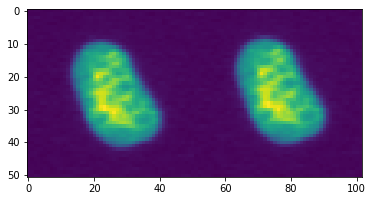

In [14]:
plt.imshow(np.concatenate([crop, crop1], axis=1))

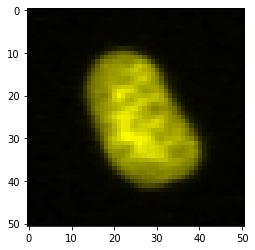

In [15]:
def normalize(im):
    return (im - im.min()) / (im.max() - im.min())

plt.imshow(np.stack([normalize(crop)*255, normalize(crop)*255, 
                     np.zeros_like(crop1)], axis=-1).astype('uint8'))

## Обратный процесс вставки кропов в общую картинку

In [ ]:
from skimage import io
import os
from collections import defaultdict

path_images = ''
path_tracks = ''
tra_gt_path = ''
crop_masks_path = ''
seg_path = ''
oseg_path = ''


r=25

with open(tra_gt_path, 'r') as file:
    tracks = [l.strip() for l in file.readlines()]

segs = defaultdict(list)
    
for i, track in enumerate(tracks):
    track_id, start_frame, end_frame, _ = list(map(int, track.split(' ')))
    for j in range(start_frame, end_frame+1):
        segs[j].append(track_id)
        
for frame in segs:
    name = path_tracks + f'man_track{frame:03d}.tif'
    img = io.imread(name)
    
    seg_name = seg_path + f'man_seg{frame:03d}.tif'
    seg = io.imread(seg_name)
    
    for track_id in segs[frame]:
        opath = os.path.join(crop_masks_path, f'track_{track_id}')
        mask = img == track_id
        if seg*mask.sum() == 0:
            print('no segmentation')
            crop = cv2.imread(opath + f'/crop_{track_id}_{frame}.tif')*track_id
            print(crop.shape, crop.max())
            y, x = np.where(mask)
            cx, cy = int(x.mean()), int(y.mean())
            h, w = img.shape[:2]
            seg[max(cy-r, 0): min(cy+r+1, h), max(cx-r, 0): min(cx+r+1, w)] = crop

    cv2.imwrite(oseg_path  + f'man_seg{frame:03d}.tif', seg)
        